In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json_logs = []
message_types = {}
comm_ids = {}
freqs = {}
float_freqs = {}
spfs = {}
snrs = {}
rssis = {}

with open("/opt/vulnelora/resources/target_eaves_logs.log", "r") as log_file:
    logs = log_file.readlines()

for entry in logs:
    json_str = entry.split(': ')[-1]
    log_data = json.loads(json_str)
    json_logs.append(log_data)

for log in json_logs:
    printing = False
    if printing:
        print(json.dumps(log, indent=2))
        print(2*"\n")

    curr_name = log["message_name"]
    message_types[curr_name] = message_types.get(curr_name, 0) + 1

    log_body = log["message_body"]
    curr_id = log_body["dev_id"]
    comm_ids[curr_id] = comm_ids.get(curr_id, 0) + 1

    if curr_name in ["RXL", "REGR"]:
        curr_rssi = log_body["rssi"]
        curr_spf = log_body["sf"]
        curr_snr = log_body["snr"]
        curr_freq = log_body["freq"]

        rssis[curr_rssi] = rssis.get(curr_rssi, 0) + 1
        snrs[curr_snr] = snrs.get(curr_snr, 0) + 1
        spfs[curr_spf] = spfs.get(curr_spf, 0) + 1
        freqs[curr_freq] = freqs.get(curr_freq, 0) + 1

    if len(freqs) != 0:
        float_freqs = {key / 1000000: value for key, value in freqs.items()}

print("----- SUMMARY -----")
print(f"Message types:\t{message_types}")
print(f"Device IDs:\t{comm_ids}")
print(f"RSSI values:\t{rssis}")
print(f"SNR values:\t{snrs}")
print(f"Frequencies:\t{float_freqs}")
print(f"SF values:\t{spfs}")

----- SUMMARY -----
Message types:	{'TXL': 8, 'RXL': 7, 'REGR': 7, 'REGA': 7, 'KEYS': 2}
Device IDs:	{'IiIi': 23, 'VVVV': 8}
RSSI values:	{-37.0: 1, -33.0: 2, -35.0: 1, -31.0: 1, -39.0: 2, -17.0: 1, -40.0: 1, -19.0: 3, -43.0: 1, -42.0: 1}
SNR values:	{8.5: 2, 9.25: 3, 11.25: 2, 8.75: 1, 9.75: 1, 11.75: 2, 13.75: 1, 13.0: 1, 11.5: 1}
Frequencies:	{866.5: 3, 866.3: 2, 866.1: 9}
SF values:	{8: 1, 7: 4, 9: 7, 11: 2}


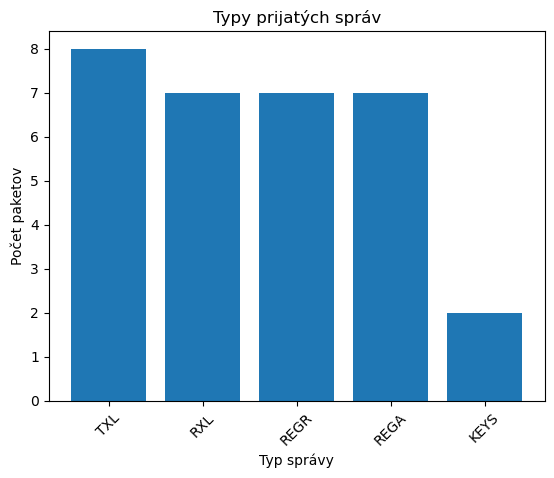

In [2]:
# Message type counter

labels = list(message_types.keys())
counts = list(message_types.values())

plt.bar(labels, counts)
plt.xlabel('Typ správy')
plt.ylabel('Počet paketov')
plt.title('Typy prijatých správ')
plt.xticks(rotation=45)
plt.savefig('/opt/vulnelora/output/LoRa@FIIT/figures/lorafiit_eaves_msg_types.png', bbox_inches='tight')
plt.show()

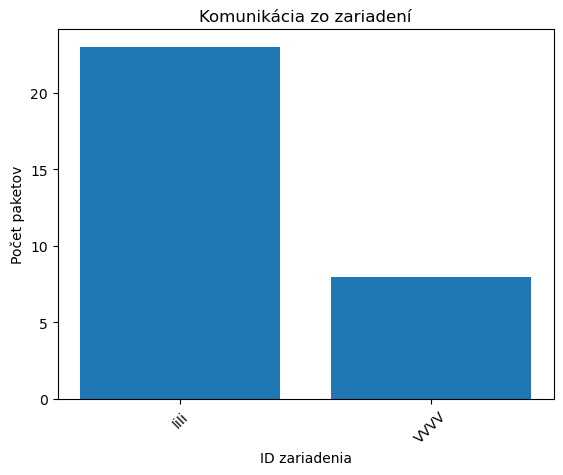

In [3]:
# Device ID counter

labels = list(comm_ids.keys())
counts = list(comm_ids.values())

plt.bar(labels, counts)
plt.xlabel('ID zariadenia')
plt.ylabel('Počet paketov')
plt.title('Komunikácia zo zariadení')
plt.xticks(rotation=45)
plt.savefig('/opt/vulnelora/output/LoRa@FIIT/figures/lorafiit_eaves_dev_ids.png', bbox_inches='tight')
plt.show()

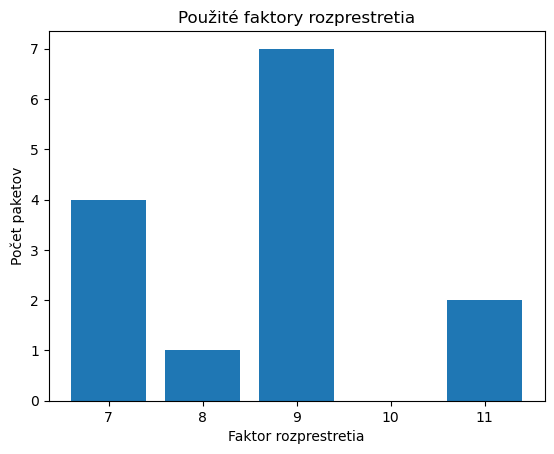

In [4]:
# Spreading factor counter

sorted_spfs = dict(sorted(spfs.items(), key=lambda item: item[0]))
labels = list(sorted_spfs.keys())
counts = list(sorted_spfs.values())

plt.bar(labels, counts)
plt.xlabel('Faktor rozprestretia')
plt.ylabel('Počet paketov')
plt.title('Použité faktory rozprestretia')
plt.xticks()
plt.savefig('/opt/vulnelora/output/LoRa@FIIT/figures/lorafiit_eaves_spf.png', bbox_inches='tight')
plt.show()

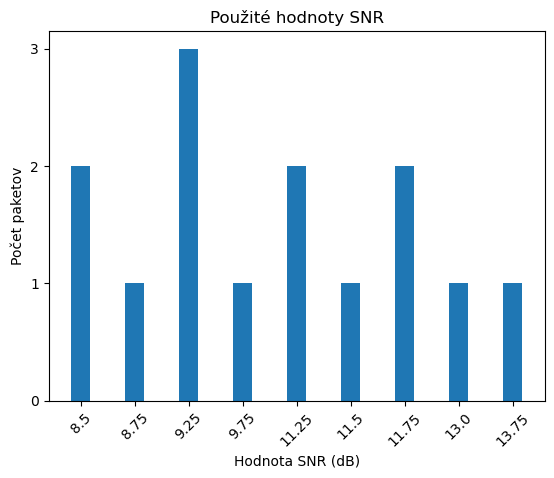

In [5]:
# SNR counter

sorted_snrs = dict(sorted(snrs.items(), key=lambda item: item[0]))
labels = list(sorted_snrs.keys())
counts = list(sorted_snrs.values())

positive_labels = [label for label, count in zip(labels, counts) if count >= 0]
positive_counts = [count for count in counts if count >= 0]

negative_labels = [label for label, count in zip(labels, counts) if count < 0]
negative_counts = [count for count in counts if count < 0]

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(positive_labels))

bar1 = ax.bar(index, positive_counts, bar_width, label='Positive Counts')

if negative_counts:
    bar2 = ax.bar(index + bar_width, np.abs(negative_counts), bar_width, label='Negative Counts')

ax.set_xlabel('Hodnota SNR (dB)')
ax.set_ylabel('Počet paketov')
ax.set_title('Použité hodnoty SNR')

if negative_counts:
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(positive_labels, rotation=45)
else:
    ax.set_xticks(index)
    ax.set_xticklabels(positive_labels, rotation=45)

# Set y-axis ticks to be integers
max_count = max(max(positive_counts), abs(min(negative_counts))) if negative_counts else max(positive_counts)
ax.set_yticks(range(int(max_count) + 1))

plt.savefig('/opt/vulnelora/output/LoRa@FIIT/figures/lorafiit_eaves_snr.png', bbox_inches='tight')
plt.show()

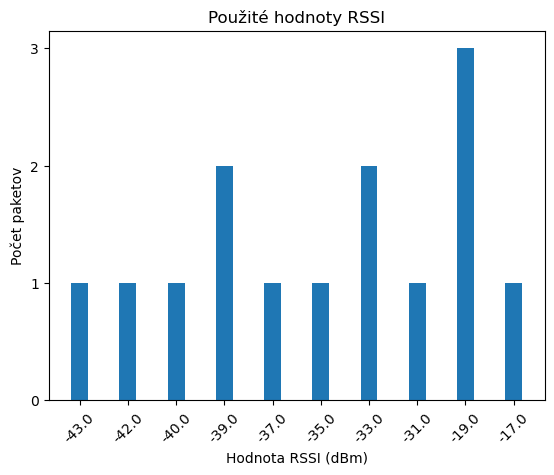

In [6]:
# RSSI counter

sorted_rssi = dict(sorted(rssis.items(), key=lambda item: item[0]))
labels = list(sorted_rssi.keys())
counts = list(sorted_rssi.values())

positive_labels = [label for label, count in zip(labels, counts) if count >= 0]
positive_counts = [count for count in counts if count >= 0]

negative_labels = [label for label, count in zip(labels, counts) if count < 0]
negative_counts = [count for count in counts if count < 0]

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(positive_labels))

bar1 = ax.bar(index, positive_counts, bar_width, label='Positive Counts')

if negative_counts:
    bar2 = ax.bar(index + bar_width, np.abs(negative_counts), bar_width, label='Negative Counts')

ax.set_xlabel('Hodnota RSSI (dBm)')
ax.set_ylabel('Počet paketov')
ax.set_title('Použité hodnoty RSSI')

if negative_counts:
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(positive_labels, rotation=45)
else:
    ax.set_xticks(index)
    ax.set_xticklabels(positive_labels, rotation=45)

# Set y-axis ticks to be integers
max_count = max(max(positive_counts), abs(min(negative_counts))) if negative_counts else max(positive_counts)
ax.set_yticks(range(int(max_count) + 1))

plt.savefig('/opt/vulnelora/output/LoRa@FIIT/figures/lorafiit_eaves_rssi.png', bbox_inches='tight')
plt.show()

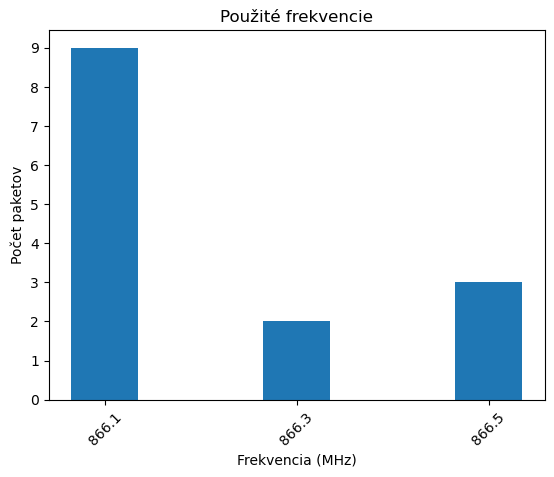

In [7]:
# Frequency counter

sorted_freqs = dict(sorted(float_freqs.items(), key=lambda item: item[0]))
labels = list(sorted_freqs.keys())
counts = list(sorted_freqs.values())

positive_labels = [label for label, count in zip(labels, counts) if count >= 0]
positive_counts = [count for count in counts if count >= 0]

negative_labels = [label for label, count in zip(labels, counts) if count < 0]
negative_counts = [count for count in counts if count < 0]

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(positive_labels))

bar1 = ax.bar(index, positive_counts, bar_width, label='Positive Counts')

if negative_counts:
    bar2 = ax.bar(index + bar_width, np.abs(negative_counts), bar_width, label='Negative Counts')

ax.set_xlabel('Frekvencia (MHz)')
ax.set_ylabel('Počet paketov')
ax.set_title('Použité frekvencie')

if negative_counts:
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(positive_labels, rotation=45)
else:
    ax.set_xticks(index)
    ax.set_xticklabels(positive_labels, rotation=45)

# Set y-axis ticks to be integers
max_count = max(max(positive_counts), abs(min(negative_counts))) if negative_counts else max(positive_counts)
ax.set_yticks(range(int(max_count) + 1))

plt.savefig('/opt/vulnelora/output/LoRa@FIIT/figures/lorafiit_eaves_freq.png', bbox_inches='tight')
plt.show()